In [1]:
import pandas as pd
import numpy as np

In [2]:
f_path = 'CMIN/CMIN-US/price/raw/BABA.csv'
df1 = pd.read_csv(f_path)
df1['Date'] = pd.to_datetime(df1['Date'])


In [3]:
f_path = 'CMIN/CMIN-US/price/raw/BAC.csv'
df2 = pd.read_csv(f_path)
df2['Date'] = pd.to_datetime(df2['Date'])

In [4]:
merge_df = pd.merge(df1[['Date','Close']], df2[['Date','Close']], on='Date', how='inner', suffixes=('_BABA', '_BAC'))

In [5]:
merge_df.set_index('Date', inplace=True, drop=True)

In [6]:
import matplotlib.pyplot as plt

In [11]:
merge_df['Close_BAC'] = merge_df['Close_BAC']/ merge_df['Close_BAC'][0]
merge_df['Close_BABA'] = merge_df['Close_BABA']/ merge_df['Close_BABA'][0]

C:\Users\yuqin\AppData\Local\Temp\ipykernel_4840\275173771.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merge_df['Close_BAC'] = merge_df['Close_BAC']/ merge_df['Close_BAC'][0]
C:\Users\yuqin\AppData\Local\Temp\ipykernel_4840\275173771.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merge_df['Close_BABA'] = merge_df['Close_BABA']/ merge_df['Close_BABA'][0]


<Axes: xlabel='Date'>

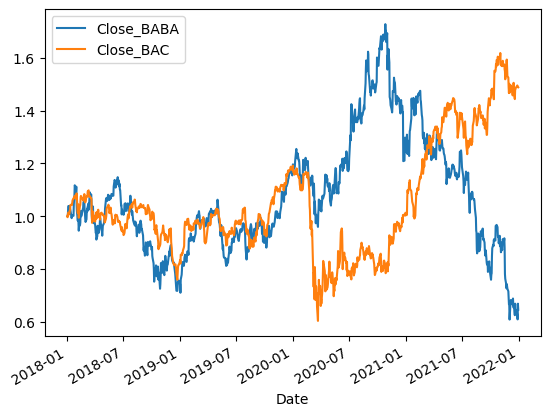

In [12]:
merge_df.plot()

In [13]:
merge_df.corr()

,Close_BABA,Close_BAC
Close_BABA,1.0000,-0.2181
Close_BAC,-0.2181,1.0000


In [18]:
rtn_df = np.log(merge_df).diff(-1).fillna(0)

In [21]:
rtn_df.corr(method='pearson')

,Close_BABA,Close_BAC
Close_BABA,1.000000,0.303503
Close_BAC,0.303503,1.000000


In [22]:
rtn_df.corr(method='spearman')

,Close_BABA,Close_BAC
Close_BABA,1.00000,0.29358
Close_BAC,0.29358,1.00000


In [24]:
rtn_df.groupby(rtn_df.index.year).corr()

Close_BABA  Close_BAC
Date                                  
2018 Close_BABA    1.000000   0.436550
     Close_BAC     0.436550   1.000000
2019 Close_BABA    1.000000   0.465117
     Close_BAC     0.465117   1.000000
2020 Close_BABA    1.000000   0.353892
     Close_BAC     0.353892   1.000000
2021 Close_BABA    1.000000   0.101842
     Close_BAC     0.101842   1.000000

<Axes: xlabel='Date'>

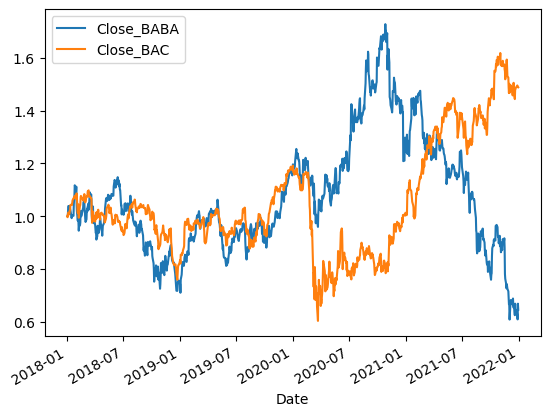

In [25]:
merge_df.plot()

In [4]:
import os

# Specify the directory
directory = 'CMIN/CMIN-US/price/raw/'

# List all files in the directory
filenames = os.listdir(directory)

print(filenames)
company_list = []
for filename in filenames:
    filename = filename[:-4]
    company_list.append(filename)
print(company_list)

['AAPL.csv', 'ABBV.csv', 'ABT.csv', 'ACN.csv', 'ADBE.csv', 'ADP.csv', 'AEP.csv', 'AMT.csv', 'AMZN.csv', 'APD.csv', 'ASML.csv', 'AVGO.csv', 'AWK.csv', 'BA.csv', 'BABA.csv', 'BAC.csv', 'BBL.csv', 'BHP.csv', 'BP.csv', 'BRK-A.csv', 'C-PJ.csv', 'CAT.csv', 'CCI.csv', 'CHTR.csv', 'CMCSA.csv', 'COP.csv', 'COST.csv', 'CSCO.csv', 'CTA-PB.csv', 'CVX.csv', 'D.csv', 'DE.csv', 'DEO.csv', 'DHR.csv', 'DIS.csv', 'DLR.csv', 'DUK.csv', 'ECL.csv', 'EL.csv', 'ENB.csv', 'EQIX.csv', 'EQNR.csv', 'EXC.csv', 'FB.csv', 'FCX.csv', 'GE.csv', 'GOOG.csv', 'HD.csv', 'HON.csv', 'JD.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'LLY.csv', 'LOW.csv', 'MA.csv', 'MCD.csv', 'MMM.csv', 'MS.csv', 'MSFT.csv', 'NEE.csv', 'NEM.csv', 'NFLX.csv', 'NGG.csv', 'NKE.csv', 'NVDA.csv', 'NVO.csv', 'NVS.csv', 'O.csv', 'ORCL.csv', 'PEP.csv', 'PFE.csv', 'PG.csv', 'PLD.csv', 'PM.csv', 'PSA.csv', 'PTR.csv', 'PYPL.csv', 'RDS-B.csv', 'RIO.csv', 'RTX.csv', 'SBAC.csv', 'SBUX.csv', 'SCHW.csv', 'SHW.csv', 'snap.csv', 'SNP.csv', 'SO.csv', 'SPG-PJ.csv', 'SR

In [5]:
from openai import OpenAI
client = OpenAI(api_key='sk-Hdf6Ybl_685eMpO2-wbhke_SblUC65NaULFM2cfOkHT3BlbkFJVcE21Wnb_pHC7uBq4bbgEq8GiWNcwuoXVrc7BhIwYA')

# Function to get the correlation between two companies
def query_gpt_for_correlation(sentence):
    systemPrompt = f"""Based on fundamental information, estimate the correlation coefficient of the following stocks. 
    You need to answer with a floating-point number between the range [-1,1], where 1 represents perfect positive correlation, -1 represents perfect negative correlation, and 0 represents no correlation.
    For example: 
                Sample Input: [BAC, BABA]
                Sample Output: Value: -0.22, Explanation:Bank of America (BAC) operates in the financial sector, while Alibaba (BABA) is in e-commerce and technology;BAC's performance is heavily influenced by the U.S. economy and financial markets, while BABA is more tied to the Chinese economy and global e-commerce;While both companies may react to global economic factors, their sensitivity to specific economic policies, such as interest rates or trade policies, differs.
                Sample Input: [TSLA, AAPL]
                Sample Output: Value: 0.25, Explanation: Both Tesla (TSLA) and Apple (AAPL) are tech-driven companies, which means they both tend to move similarly when the broader technology sector is affected by investor sentiment or market conditions;Tesla operates in the electric vehicle and renewable energy space, while Apple is focused on consumer electronics;Both stocks are high-growth companies and are often included in tech-focused investment portfolios. Positive or negative sentiment around tech stocks can lead to both moving in the same direction, contributing to a moderate correlation. 
"""
    prompt = sentence
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": systemPrompt
            },
            {
                "role": "user",
                "content": prompt
            }
        ],
        temperature=0.7,
        max_tokens=1500,
        top_p=1,
        frequency_penalty=0.0,
        presence_penalty=0.0
    )

    return response.choices[0].message.content

In [6]:
company_list=company_list[:20]
n_company =len(company_list)

In [122]:
# from tqdm import trange
# import time
# test = range(10)
# # 写一个trange demo
# for i in trange(10):
#     time.sleep(0.5)

100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


In [8]:
# define a function to extract the correlation value from the response
def get_value(sample):
    import re
    pattern = r'Value: (-?\d+\.\d+)'
    match = re.search(pattern, sample)
    value= float(match.group(1))
    return value

correlation_value_list = []
company_pairs = []
for i in range(n_company):
    for j in range(i+1):
        if i != j:
            company_pairs.append([company_list[i], company_list[j]])

for i in range(len(company_pairs)):
    company = company_pairs[i][0]
    company2 = company_pairs[i][1]
    sentence = f"Input: [{company}, {company2}]"
    response = query_gpt_for_correlation(sentence)
    correlation_value = get_value(response)
    correlation_value_list.append(correlation_value)
    print(sentence, correlation_value)

# 创建相关系数矩阵
import pandas as pd

# 加载CSV数据
data = pd.read_csv(r'C:\Users\yuqin\firsttry\correlation_df.csv')

# 清理并提取公司对和相关系数
data['Company'] = data['Company'].apply(lambda x: eval(x))  # 将字符串转换为列表
data['Company1'] = data['Company'].apply(lambda x: x[0])
data['Company2'] = data['Company'].apply(lambda x: x[1])

# 创建矩阵格式的透视表
matrix_df = data.pivot_table(index='Company1', columns='Company2', values='Correlation')

# 通过镜像矩阵来填补缺失值（因为相关性是对称的）
matrix_df = matrix_df.combine_first(matrix_df.T)

# 对角线填入1（公司与自身的相关性为1）
for company in matrix_df.columns:
    matrix_df.loc[company, company] = 1.0
matrix_df.to_csv(r'C:\Users\yuqin\firsttry\correlation_matrix.csv')

Input: [ABBV, AAPL] 0.15
Input: [ABT, AAPL] 0.15
Input: [ABT, ABBV] 0.67
Input: [ACN, AAPL] 0.35
Input: [ACN, ABBV] 0.1
Input: [ACN, ABT] 0.15
Input: [ADBE, AAPL] 0.65
Input: [ADBE, ABBV] 0.15
Input: [ADBE, ABT] 0.15
Input: [ADBE, ACN] 0.68
Input: [ADP, AAPL] 0.15
Input: [ADP, ABBV] 0.15
Input: [ADP, ABT] 0.15
Input: [ADP, ACN] 0.6
Input: [ADP, ADBE] 0.35
Input: [AEP, AAPL] 0.15
Input: [AEP, ABBV] 0.15
Input: [AEP, ABT] 0.1
Input: [AEP, ACN] 0.15
Input: [AEP, ADBE] 0.15
Input: [AEP, ADP] 0.15
Input: [AMT, AAPL] 0.4
Input: [AMT, ABBV] 0.15
Input: [AMT, ABT] 0.1
Input: [AMT, ACN] 0.35
Input: [AMT, ADBE] 0.35
Input: [AMT, ADP] 0.35
Input: [AMT, AEP] 0.15
Input: [AMZN, AAPL] 0.35
Input: [AMZN, ABBV] 0.05
Input: [AMZN, ABT] 0.15
Input: [AMZN, ACN] 0.35
Input: [AMZN, ADBE] 0.35
Input: [AMZN, ADP] 0.15
Input: [AMZN, AEP] -0.15
Input: [AMZN, AMT] 0.3
Input: [APD, AAPL] 0.15
Input: [APD, ABBV] 0.15
Input: [APD, ABT] 0.1
Input: [APD, ACN] 0.15
Input: [APD, ADBE] 0.15
Input: [APD, ADP] 0.15
Input

KeyboardInterrupt: 

In [ ]:
#construct graph


import pandas as pd
# Create a DataFrame to store the correlation values
correlation_df = pd.DataFrame(correlation_value_list, columns=['Correlation'])
correlation_df['Company'] = company_pairs
correlation_df = correlation_df[['Company', 'Correlation']]
correlation_df.to_csv('correlation_df.csv', index=False)
print(correlation_df)

import networkx as nx   
import matplotlib.pyplot as plt
# Create a graph object
G = nx.Graph()

# Add nodes to the graph
for company in company_list:
    G.add_node(company)

# Add edges to the graph
for i in range(len(company_pairs)):
    company1 = company_pairs[i][0]
    company2 = company_pairs[i][1]
    correlation = correlation_value_list[i]
    # if abs(correlation) > 0.5:
    #     G.add_edge(company1, company2, weight=correlation)
    G.add_edge(company1, company2, weight=correlation)
# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

# Draw edges with weights
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges])

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=500, node_color='skyblue', edge_color='black', linewidths=1, font_color='black')
plt.title('Stock Correlation Network')
plt.show()

In [6]:
import torch
c=[]
a = [1,2,3]
b = [4,5,6]
c.append(a)
c.append(b)
c = torch.tensor(c, dtype=torch.long).t().contiguous()
c.shape

torch.Size([3, 2])

In [15]:
import torch
a=1
b=2
c=3
d=[]
d.append(a)
d.append(b)
d.append(c)
d = torch.tensor(d, dtype=torch.float)
d.shape

torch.Size([3])

In [16]:
c=torch.randn(2,3)
c
# 矩阵相乘
e=torch.mm(c,d)
e
e.shape

RuntimeError: mat2 must be a matrix

In [18]:
# 读取pkl文件
import pickle
with open('stock_data.pkl', 'rb') as f:
    correlation_matrix = pickle.load(f)
print(correlation_matrix)

[[[-1.74224809e-04  1.39280439e-02  1.30586184e-02  1.59518614e-02
   -1.74155351e-04  1.18071600e+08]
  [ 4.64488613e-03  5.79145656e-05 -6.18736165e-03  6.97790151e-04
    4.64497485e-03  8.97384000e+07]
  [ 1.13854524e-02  5.21625155e-03  1.09528795e-02  5.63693631e-03
    1.13853089e-02  9.46400000e+07]
  ...
  [ 1.97719146e-02  1.54316117e-02  2.12923892e-02  1.53855948e-02
    1.97720798e-02  1.52648800e+08]
  [-3.24071766e-03  1.55939885e-02  6.07612464e-03  1.10663181e-02
   -3.24076661e-03  1.55712400e+08]
  [-1.51341015e-03  8.93288626e-04  7.75709237e-04 -6.17422528e-04
   -1.51356018e-03  1.51128400e+08]]

 [[ 1.56491005e-02  1.45151741e-02  1.21334275e-02  1.33333437e-02
    1.56487444e-02  4.70230000e+06]
  [-5.70285542e-03  1.54236119e-02  1.99850154e-04  3.16194407e-03
   -5.70285160e-03  3.57900000e+06]
  [ 1.74077477e-02 -7.29493355e-03  1.07869953e-02  2.13523136e-03
    1.74079699e-02  4.59930000e+06]
  ...
  [ 2.34950216e-02  7.26284073e-03  2.01995058e-02  1.83933

In [ ]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from model_first import construct_graph
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch_geometric.nn import global_mean_pool

def create_data(stock_data, correlation_matrix, window=20, batch_size=32):
    num_stocks, num_time_steps, num_features = stock_data.shape

    # 数据标准化
    scaler = StandardScaler()
     # 对整个 stock_data 进行了标准化，stock_data 是形状为 (num_stocks, num_time_steps, num_features) 
    stock_data = scaler.fit_transform(stock_data.reshape(-1, num_features)).reshape(num_stocks, num_time_steps, num_features)
   
    
    # 初始化存储批次数据的列表
    batch_data_list = []

    # 滚动窗口生成批次
    for start in range(num_time_steps - window):

        # 当前窗口的节点特征：过去20天的收盘价
        node_features = torch.tensor(stock_data[:, start:start + window, 3], dtype=torch.float32)  # 使用收盘价作为节点特征
        node_features = node_features.view(num_stocks, window)

        # 创建图的边和边特征
        edge_index, edge_attr = construct_graph(correlation_matrix, threshold=0.1)

        # 目标值：窗口结束后的第一个时间步的收盘价
        y = torch.tensor(stock_data[:, start + window, 3], dtype=torch.float32)

        # 创建图数据对象 Data((num_nodes, time_step=20), torch.Size([2, num_edges]), torch.Size([num_edges]), (num_nodes, num_targets=1))
        data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y)
    
        # 将数据对象添加到批次列表
        batch_data_list.append(data)

    # 返回一个包含num_stocks*batch_size个图数据对象的列表
    print(batch_data_list)
    return batch_data_list



# 读取数据
import pickle
with open('my_data.pkl', 'rb') as f:
    my_data = pickle.load(f)
print(my_data.shape)

#  初始化一个空的三维数组，用于存储股价数据
stock_data = np.zeros((20, 99, 6))

#  将数据加载到stock_data中,(num_stock, num_days, num_features)
for i, stock_code in enumerate(my_data['code'].unique()):
    stock_data[i] = my_data[my_data['code'] == stock_code].iloc[:, 1:7].values

print(stock_data.shape)
# 获取相关系数（值）矩阵
correlation_path=r"C:\Users\yuqin\firsttry\data\correlation_matrix.csv"
correlation_matrix = pd.read_csv(correlation_path)
correlation_matrix = correlation_matrix.iloc[0:20, 1:21].values

batch_data_list = create_data(stock_data, correlation_matrix, window=20, batch_size=32)
train_data, test_data = train_test_split(batch_data_list, test_size=0.2, random_state=42)#训练集和测试集如何划分，需要进一步探讨？？
train_loader = DataLoader(train_data, batch_size=32, shuffle=True) 
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


(1980, 8)
(20, 99, 6)
[Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], 

In [51]:

def _map_to_global(self, edge_index, batch_index):
        # 扩展边索引以映射到全局节点索引
        num_nodes = batch_index.size(0)  # 所有节点的总数量
        # 创建全局图的节点索引
        global_edge_index = edge_index.clone()
        # 为每个节点添加偏移量
        node_offsets = torch.cumsum(torch.bincount(batch_index), dim=0)
        node_offsets = torch.cat([torch.tensor([0], device=edge_index.device), node_offsets[:-1]])

        # 映射到全局索引
        global_edge_index[0] += node_offsets[batch_index[edge_index[0]]]
        global_edge_index[1] += node_offsets[batch_index[edge_index[1]]]
    
        return global_edge_index
for batch in train_loader:
    x, edge_index, edge_attr, batch_index = batch.x, batch.edge_index, batch.edge_attr, batch.batch
    print("x shape:", x.shape)
    x = global_mean_pool(x, batch_index)
    print("x shape:", x.shape)

x shape: torch.Size([640, 20])
x shape: torch.Size([32, 20])
x shape: torch.Size([620, 20])
x shape: torch.Size([31, 20])


In [47]:
class GCNLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNLayer, self).__init__()
        self.conv = GCNConv(in_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        return self.conv(x, edge_index)
x = GCNLayer(x, edge_index)
# import model
# from model import *


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
x = torch.randn(640,64)


In [32]:
model = GCNStockPredictor(input_dim=20, hidden_dim=64, num_heads=4, num_layers=2)
import trainer
loss_values = trainer.train_model(model, train_loader, epochs=50, lr=0.001)

64
Training...


d:\anaconda3\envs\MyFiSt\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


RuntimeError: mat1 and mat2 shapes cannot be multiplied (60x5 and 20x64)

In [53]:
x = range(0,50)
x

range(0, 50)

In [ ]:
# 读取pickle文件
import pickle
import numpy as np
path = r"C:\Users\yuqin\firsttry\my_data.pkl"
with open(path, 'rb') as f:
    all_data = pickle.load(f)
print(all_data)


#  初始化一个空的三维数组，用于存储股价数据
stock_data = np.zeros((20, 99, 6))

#  将数据加载到stock_data中
for i, stock_code in enumerate(all_data['code'].unique()):
    stock_data[i] = all_data[all_data['code'] == stock_code].iloc[:, 1:7].values
print(stock_data.shape)

#提取收盘价
stock_data = stock_data[:,:,3]
print(stock_data.shape)


              dt      open      high       low     close  adj close  \
0     2018-01-03 -0.000174  0.013928  0.013059  0.015952  -0.000174   
1     2018-01-04  0.004645  0.000058 -0.006187  0.000698   0.004645   
2     2018-01-05  0.011385  0.005216  0.010953  0.005637   0.011385   
3     2018-01-08 -0.003714  0.005247  0.001369  0.005085  -0.003714   
4     2018-01-09 -0.000115  0.001147 -0.003132 -0.002990  -0.000115   
...          ...       ...       ...       ...       ...        ...   
1975  2018-05-18 -0.006949 -0.001045 -0.001348 -0.003508  -0.006949   
1976  2018-05-21  0.007609 -0.000810  0.004503  0.006055   0.007609   
1977  2018-05-22  0.001251  0.003714  0.001763  0.000883   0.001251   
1978  2018-05-23 -0.008724 -0.002691 -0.005766 -0.011348  -0.008724   
1979  2018-05-24 -0.008662 -0.008499 -0.008328 -0.004869  -0.008662   

         volume   code  
0     118071600   AAPL  
1      89738400   AAPL  
2      94640000   AAPL  
3      82271200   AAPL  
4      86336000   AAPL

In [5]:
from data.feature_adjacent_matrix import fadj
# 将矩阵中小于0.3的值设置为0
fadj[fadj<0.3] = 0
print(fadj)



[[0.34570737 0.47283659 0.55249954 0.61009722 0.45695348 0.
  0.38312227 0.59880894 0.41630392 0.53720866 0.53197557 0.
  0.3536525  0.44786552 0.35994177 0.42345182 0.4155628  0.
  0.50295923]
 [1.         0.40229613 0.4631461  0.37880335 0.42315322 0.
  0.30733124 0.         0.3472091  0.33578641 0.35042355 0.
  0.33124755 0.         0.36499972 0.31049028 0.30872149 0.
  0.44327585]
 [0.40229613 1.         0.5424515  0.47328888 0.46139523 0.39858058
  0.45391007 0.4219725  0.4646266  0.39039319 0.38535399 0.43411242
  0.         0.33433266 0.34421573 0.34652557 0.35206444 0.
  0.49772766]
 [0.4631461  0.5424515  1.         0.56879953 0.64562938 0.45750113
  0.49728997 0.48639143 0.59132908 0.55691209 0.50245404 0.38512949
  0.44161783 0.39750941 0.52887541 0.53784392 0.54263812 0.41485842
  0.63924216]
 [0.37880335 0.47328888 0.56879953 1.         0.51610796 0.
  0.32916031 0.6545379  0.38259856 0.59494098 0.50323015 0.
  0.3599567  0.47564769 0.         0.37241738 0.36808643 0.
  0.

In [8]:
import torch
x = torch.randn(4, 4)
print(x)
x[x<0.2] = 0
print(x)
# 将对角线元素设置为1
x.fill_diagonal_(1)
print(x)

tensor([[-0.6369,  0.4135, -0.2983, -0.8699],
        [ 1.8241, -0.4960, -0.7140, -0.2375],
        [ 0.5532,  1.4378,  1.2707, -1.6193],
        [-0.7798,  0.7177, -0.8455,  0.4825]])
tensor([[0.0000, 0.4135, 0.0000, 0.0000],
        [1.8241, 0.0000, 0.0000, 0.0000],
        [0.5532, 1.4378, 1.2707, 0.0000],
        [0.0000, 0.7177, 0.0000, 0.4825]])
tensor([[1.0000, 0.4135, 0.0000, 0.0000],
        [1.8241, 1.0000, 0.0000, 0.0000],
        [0.5532, 1.4378, 1.0000, 0.0000],
        [0.0000, 0.7177, 0.0000, 1.0000]])


In [ ]:
# 统计每行的非零元素个数
file_path =r"C:\Users\yuqin\firsttry\data\correlation_matrix.csv" 
import pandas as pd
correlation_matrix = pd.read_csv(file_path)
correlation_matrix = correlation_matrix.iloc[0:20, 1:21].values
correlation_matrix[abs(correlation_matrix)<0.3] = 0
non_zero_count = (correlation_matrix != 0).sum(axis=1)-1
non_zero_mean = non_zero_count.sum()/20
print(non_zero_count, non_zero_mean)

[9 1 1 8 8 6 1 3 7 3 6 7 1 2 6 4 3 2 4 8] 4.5


In [20]:
# 查看edge_index, edge_attr的形状
import torch    
from main import train_loader
for batch in train_loader:
    x, edge_index, edge_attr, batch_index = batch.x, batch.edge_index, batch.edge_attr, batch.batch
    print(x.shape)
    print("edge_index shape:", edge_index.shape)
    print("edge_attr shape:", edge_attr.shape)
    break

torch.Size([640, 20])
edge_index shape: torch.Size([2, 9920])
edge_attr shape: torch.Size([9920])


In [ ]:
support = torch.mm(input, self.weight)
output = torch.spmm(adj, support)

In [ ]:
import torch
x1=torch.randn(2,3)
x2=torch.randn(3,4)
x3=torch.mm(x1,x2)
print(x3)




In [ ]:
# 将adj转换为稀疏张量
from sklearn.metrics.pairwise import cosine_similarity
import torch
x1=torch.randn(10,5)
matrix = cosine_similarity(x1)
print(matrix)
import numpy as np
indices = np.array(np.nonzero(matrix))  # 获取非零元素的行列索引
values = matrix[indices[0], indices[1]]  # 获取对应的非零值

# 将 indices 转换为 torch.Tensor
indices = torch.LongTensor(indices)

# 将 values 转换为 torch.Tensor
values = torch.FloatTensor(values)

# 创建一个稀疏张量
shape = matrix.shape  # 原数组的形状
sparse_tensor = torch.sparse_coo_tensor(indices, values, shape)

# 输出稀疏张量
print("Sparse tensor:")
print(sparse_tensor)


[[ 1.          0.7040075   0.28613687 -0.53040224  0.02279595  0.4063969
  -0.782793   -0.2301002  -0.27623415 -0.6315781 ]
 [ 0.7040075   1.          0.42137244 -0.19314873 -0.27792168  0.8479348
  -0.6741278   0.1529089  -0.20142862 -0.8085135 ]
 [ 0.28613687  0.42137244  1.0000001  -0.14398791  0.62795174 -0.05037412
  -0.81275594 -0.03430042 -0.5579583  -0.18500037]
 [-0.53040224 -0.19314873 -0.14398791  1.         -0.37615955 -0.00227043
   0.4423832  -0.01338059 -0.43322942  0.32943538]
 [ 0.02279595 -0.27792168  0.62795174 -0.37615955  1.0000001  -0.6730782
  -0.41525072 -0.4422981  -0.32169095  0.45272413]
 [ 0.4063969   0.8479348  -0.05037412 -0.00227043 -0.6730782   1.0000001
  -0.18405049  0.28268802  0.12902696 -0.7198305 ]
 [-0.782793   -0.6741278  -0.81275594  0.4423832  -0.41525072 -0.18405049
   0.99999994  0.09099747  0.48213065  0.53532284]
 [-0.2301002   0.1529089  -0.03430042 -0.01338059 -0.4422981   0.28268802
   0.09099747  1.          0.5582822  -0.5782256 ]
 [-0

In [ ]:
# 将adj转化为张量
tensor = torch.from_numpy(matrix)
output = torch.spmm(tensor, support)

In [35]:
import pandas as pd 
correlation_path=r"C:\Users\yuqin\firsttry\data\correlation_matrix.csv"
correlation_matrix = pd.read_csv(correlation_path)
sadj = correlation_matrix.iloc[0:20, 1:21].values
sadj[sadj < 0.3] = 0  # 将相关系数小于0.3的边删除
print(sadj.shape)
# 判断是否是 numpy.ndarray 类型
if isinstance(sadj, np.ndarray):
    print("sadj 是一个 numpy.ndarray")
else:
    print("sadj 不是一个 numpy.ndarray")
sadj = torch.tensor(sadj, dtype=torch.float32)
if isinstance(sadj, np.ndarray):
    print("sadj 是一个 numpy.ndarray")
else:
    print("sadj 不是一个 numpy.ndarray")

(20, 20)
sadj 是一个 numpy.ndarray
sadj 不是一个 numpy.ndarray


In [38]:
import torch
x = torch.randn(5,5)
print(x)
# 只保留每行前5个最大的值，其余的值设置为0
_, indices = x.topk(2, dim=1)
print(indices)
for i in range(x.size(0)):
    x[i][x[i] < x[i, indices[i][-1]]] = 0
print(x)


tensor([[ 1.8144, -2.2193, -0.4141, -0.8200, -0.4098],
        [-1.5581,  1.1052, -1.4366,  1.6742,  0.7849],
        [-0.7761, -0.7545, -0.8297,  0.4517,  0.6463],
        [ 0.3189,  0.0555,  1.2401, -0.5318,  2.0426],
        [ 0.6017,  0.5958,  0.3841, -0.8141,  0.4347]])
tensor([[0, 4],
        [3, 1],
        [4, 3],
        [4, 2],
        [0, 1]])
tensor([[ 1.8144,  0.0000,  0.0000,  0.0000, -0.4098],
        [ 0.0000,  1.1052,  0.0000,  1.6742,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.4517,  0.6463],
        [ 0.0000,  0.0000,  1.2401,  0.0000,  2.0426],
        [ 0.6017,  0.5958,  0.0000,  0.0000,  0.0000]])


In [44]:
from main import train_loader
for batch in train_loader:
    print(batch)

            # x, edge_index, batch_index, fadj, sadj = batch.x, batch.edge_index, batch.batch, batch.fadj, batch.sadj
            # print("x shape:", x.shape, "edge_index shape:", edge_index.shape,  "fadj shape:", fadj.shape, "sadj shape:", sadj.shape)

DataBatch(x=[640, 20], edge_index=[2, 9920], edge_attr=[9920], y=[640], batch=[640], ptr=[33])
DataBatch(x=[620, 20], edge_index=[2, 9610], edge_attr=[9610], y=[620], batch=[620], ptr=[32])


In [50]:
from main import train_loader, batch_data_list

# for batch in train_loader:
#     x, edge_index, edge_attr, batch_index, fadj, sadj = batch.x, batch.edge_index, batch.edge_attr, batch.batch, batch.fadj, batch.sadj
#     print("x shape:", x.shape, "edge_index shape:", edge_index.shape,  "fadj shape:", fadj.shape, "sadj shape:", sadj.shape)
#     break
print(batch_data_list)

[Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], edge_attr=[310], y=[20]), Data(x=[20, 20], edge_index=[2, 310], e

In [ ]:
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Dataset
 
# 随机数种子
np.random.seed(0)
 
 
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences
 
    def __len__(self):
        return len(self.sequences)
 
    def __getitem__(self, index):
        sequence, label = self.sequences[index]
        return torch.Tensor(sequence), torch.Tensor(label)
 
 
def calculate_mae(y_true, y_pred):
    # 平均绝对误差
    mae = np.mean(np.abs(y_true - y_pred))
    return mae
 
"""
数据定义部分
"""
true_data = pd.read_csv('ETTh1.csv')  # 填你自己的数据地址,自动选取你最后一列数据为特征列
 
 
target = 'OT'  # 添加你想要预测的特征列
test_size = 0.15  # 训练集和测试集的尺寸划分
train_size = 0.85  # 训练集和测试集的尺寸划分
pre_len = 4  # 预测未来数据的长度
train_window = 32  # 观测窗口
 
# 这里加一些数据的预处理, 最后需要的格式是pd.series
true_data = np.array(true_data[target])
 
# 定义标准化优化器
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaler_test = MinMaxScaler(feature_range=(0, 1))
 
# 训练集和测试集划分
train_data = true_data[:int(train_size * len(true_data))]
test_data = true_data[-int(test_size * len(true_data)):]
print("训练集尺寸:", len(train_data))
print("测试集尺寸:", len(test_data))
 
# 进行标准化处理
train_data_normalized = scaler_train.fit_transform(train_data.reshape(-1, 1))
test_data_normalized = scaler_test.fit_transform(test_data.reshape(-1, 1))
 
# 转化为深度学习模型需要的类型Tensor
train_data_normalized = torch.FloatTensor(train_data_normalized)
test_data_normalized = torch.FloatTensor(test_data_normalized)
 
 
def create_inout_sequences(input_data, tw, pre_len):
    # 创建时间序列数据专用的数据分割器
    inout_seq = []
    L = len(input_data)
    for i in range(L - tw):
        train_seq = input_data[i:i + tw]
        if (i + tw + 4) > len(input_data):
            break
        train_label = input_data[i + tw:i + tw + pre_len]
        inout_seq.append((train_seq, train_label))
    return inout_seq
 
 
# 定义训练器的的输入
train_inout_seq = create_inout_sequences(train_data_normalized, train_window, pre_len)
test_inout_seq = create_inout_sequences(test_data_normalized, train_window, pre_len)
 
# 创建数据集
train_dataset = TimeSeriesDataset(train_inout_seq)
test_dataset = TimeSeriesDataset(test_inout_seq)
 
# 创建 DataLoader
batch_size = 32  # 你可以根据需要调整批量大小
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
 
 
class GRU(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32, num_layers=1, output_dim=1, pre_len= 4):
        super(GRU, self).__init__()
        self.pre_len = pre_len
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        # 替换 LSTM 为 GRU
        self.gru = nn.GRU(input_dim, hidden_dim,num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        h0_gru = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
 
        out, _ = self.gru(x, h0_gru)
 
        out = self.dropout(out)
 
        # 取最后 pre_len 时间步的输出
        out = out[:, -self.pre_len:, :]
 
        out = self.fc(out)
        out = self.relu(out)
        return out
 
 
lstm_model = GRU(input_dim=1, output_dim=1, num_layers=2, hidden_dim=train_window, pre_len=pre_len)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.005)
epochs = 20
Train = True  # 训练还是预测
 
if Train:
    losss = []
    lstm_model.train()  # 训练模式
    for i in range(epochs):
        start_time = time.time()  # 计算起始时间
        for seq, labels in train_loader:
            lstm_model.train()
            optimizer.zero_grad()
 
            y_pred = lstm_model(seq)
 
            single_loss = loss_function(y_pred, labels)
 
            single_loss.backward()
            optimizer.step()
            print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
        losss.append(single_loss.detach().numpy())
    torch.save(lstm_model.state_dict(), 'save_model.pth')
    print(f"模型已保存,用时:{(time.time() - start_time) / 60:.4f} min")
 
 
else:
    # 加载模型进行预测
    lstm_model.load_state_dict(torch.load('save_model.pth'))
    lstm_model.eval()  # 评估模式
    results = []
    reals = []
    losss = []
 
    for seq, labels in test_loader:
        pred = lstm_model(seq)
        mae = calculate_mae(pred.detach().numpy(), np.array(labels))  # MAE误差计算绝对值(预测值  - 真实值)
        losss.append(mae)
        for j in range(batch_size):
            for i in range(pre_len):
                reals.append(labels[j][i][0].detach().numpy())
                results.append(pred[j][i][0].detach().numpy())
 
    reals = scaler_test.inverse_transform(np.array(reals).reshape(1, -1))[0]
    results = scaler_test.inverse_transform(np.array(results).reshape(1, -1))[0]
    print("模型预测结果：", results)
    print("预测误差MAE:", losss)
 
    plt.figure()
    plt.style.use('ggplot')
 
    # 创建折线图
    plt.plot(reals, label='real', color='blue')  # 实际值
    plt.plot(results, label='forecast', color='red', linestyle='--')  # 预测值
 
    # 增强视觉效果
    plt.grid(True)
    plt.title('real vs forecast')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.legend()
    plt.savefig('test——results.png')

In [14]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
x1 = torch.randn(3,3)
x2 = torch.randn(3,3)
x3 = torch.randn(3,3)
x4 = torch.randn(3,3)
x5 = torch.randn(3,3)
y1 = 1
y2 = 2
y3 = 3
y4 = 4
y5 = 5
z1 = sadj = x1 + torch.eye(x1.size(0), dtype=torch.float32)
z2 = sadj = x2 + torch.eye(x2.size(0), dtype=torch.float32)
z3 = sadj = x3 + torch.eye(x3.size(0), dtype=torch.float32)
z4 = sadj = x4 + torch.eye(x4.size(0), dtype=torch.float32)
z5 = sadj = x5 + torch.eye(x5.size(0), dtype=torch.float32)
list = []
list.append((x1,y1,z1))
list.append((x2,y2,z2))
list.append((x3,y3,z3))
list.append((x4,y4,z4))
list.append((x5,y5,z5))
print(list)
train_data, test_data = train_test_split(list, test_size=0.2, random_state=42)
for i in train_data:
    x = i[2]
    y = i[1]
    print(x.dtype)
   



[(tensor([[ 0.5534, -0.3601, -0.6340],
        [ 0.1635,  1.5712,  0.8667],
        [ 1.1764, -0.1071, -0.4689]]), 1, tensor([[ 1.5534, -0.3601, -0.6340],
        [ 0.1635,  2.5712,  0.8667],
        [ 1.1764, -0.1071,  0.5311]])), (tensor([[ 0.8329,  0.1977, -1.0800],
        [-0.8097,  0.7092,  1.4769],
        [ 0.8609, -0.3399, -1.0729]]), 2, tensor([[ 1.8329,  0.1977, -1.0800],
        [-0.8097,  1.7092,  1.4769],
        [ 0.8609, -0.3399, -0.0729]])), (tensor([[-0.1230, -0.6563, -0.6860],
        [-1.3283, -1.0717,  1.6726],
        [-0.0964,  0.0634, -1.2715]]), 3, tensor([[ 0.8770, -0.6563, -0.6860],
        [-1.3283, -0.0717,  1.6726],
        [-0.0964,  0.0634, -0.2715]])), (tensor([[-0.9171, -0.0213,  1.6839],
        [ 1.3951, -1.6313,  0.9454],
        [-0.9708,  1.0789,  0.7826]]), 4, tensor([[ 0.0829, -0.0213,  1.6839],
        [ 1.3951, -0.6313,  0.9454],
        [-0.9708,  1.0789,  1.7826]])), (tensor([[-1.0664,  0.1757, -0.7298],
        [-1.2734,  0.7878,  1.1489],


In [16]:
import numpy as np
x = np.random.randn(3,3)
print(x.dtype)

float64


In [2]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MyNeuralNetwork().to(device)  # 将模型移到GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 假设我们有输入数据和标签
inputs = inputs.to(device)
labels = labels.to(device)

NameError: name 'torch' is not defined

In [3]:
import os
import pandas as pd
import torch 
# Specify the directory
directory = 'CMIN/CMIN-US/price/raw/'
# List all files in the directory
filenames = os.listdir(directory)
company_list = []
for filename in filenames:
    filename = filename[:-4]
    company_list.append(filename)

n_company =len(company_list)
n_company



110

In [4]:
print('d')

d


In [1]:
import os
## 获取股票数据 
folder_path = '/root/firsttry/CMIN/CMIN-US/price/processed/'

## 获取文件夹中所有文件的文件名
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
print(file_list)

['NEM.txt', 'AAPL.txt', 'NFLX.txt', 'ABBV.txt', 'NGG.txt', 'ABT.txt', 'NKE.txt', 'ACN.txt', 'NVO.txt', 'ADBE.txt', 'NVDA.txt', 'ADP.txt', 'NVS.txt', 'AEP.txt', 'O.txt', 'AMT.txt', 'RIO.txt', 'AMZN.txt', 'RTX.txt', 'APD.txt', 'SBAC.txt', 'ASML.txt', 'SBUX.txt', 'AVGO.txt', 'SCHW.txt', 'AWK.txt', 'SHW.txt', 'BA.txt', 'SNP.txt', 'BABA.txt', 'SO.txt', 'BAC.txt', 'SPG-PJ.txt', 'BBL.txt', 'SRE.txt', 'BHP.txt', 'T.txt', 'BP.txt', 'TGT.txt', 'BRK-A.txt', 'TM.txt', 'C-PJ.txt', 'TMO.txt', 'CAT.txt', 'TMUS.txt', 'CCI.txt', 'TSLA.txt', 'CHTR.txt', 'TSM.txt', 'CMCSA.txt', 'TTE.txt', 'COP.txt', 'UL.txt', 'COST.txt', 'UNH.txt', 'CSCO.txt', 'UPS.txt', 'CTA-PB.txt', 'Unp.txt', 'CVX.txt', 'V.txt', 'D.txt', 'VALE.txt', 'DE.txt', 'VZ.txt', 'DEO.txt', 'WELL.txt', 'DHR.txt', 'WFC-PL.txt', 'DIS.txt', 'WMT.txt', 'DLR.txt', 'XEL.txt', 'DUK.txt', 'XOM.txt', 'ECL.txt', 'snap.txt', 'EL.txt', 'ENB.txt', 'EQIX.txt', 'EQNR.txt', 'EXC.txt', 'FB.txt', 'FCX.txt', 'GE.txt', 'GOOG.txt', 'HD.txt', 'HON.txt', 'JD.txt', 'JN

In [ ]:
import os
import pandas as pd
import numpy as np
from model import *
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 设定数据量
n_company = 20
num_days = 1002  # 股价天数
num_features = 6  # 每个时间点有6个特征（如开盘价、收盘价等）

## 获取股票数据 
folder_path = '/root/firsttry/CMIN/CMIN-US/price/processed/'

## 获取文件夹中所有文件的文件名
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]


## 初始化一个空的DataFrame用于存储合并后的数据
all_data = pd.DataFrame()

##迭代每个文件，读取文件并添加文件名列
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='\t', header=None, names=['dt', 'open', 'high', 'low', 'close', 'adj close', 'volume'])  # 读取文件
    df['code'] = file_name[0:-4]  # 在DataFrame中添加一列，用于存储文件名
    all_data = pd.concat([all_data, df], ignore_index=True)  # 合并当前文件数据到总数据
# all_data = all_data.to(device)

# 保存合并后的DataFrame为pkl文件 (num_stock*num_features, index+file_name+num_features+)
output_path = 'my_data.pkl'
all_data.to_pickle(output_path)

#  初始化一个空的三维数组，用于存储股价数据
stock_data = np.zeros((n_company, num_days, num_features))
print(stock_data.shape)
#  将数据加载到stock_data中
for i, stock_code in enumerate(all_data['code'].unique()):
    print(i,stock_code)
    stock_data[i] = all_data[all_data['code'] == stock_code].iloc[:, 1:7].values


(20, 1002, 6)
0 NEM
1 AAPL
2 NFLX
3 ABBV
4 NGG
5 ABT
6 NKE
7 ACN
8 NVO
9 ADBE
10 NVDA
11 ADP
12 NVS
13 AEP
14 O
15 AMT
16 RIO
17 AMZN
18 RTX
19 APD


In [10]:
import numpy as np
import torch 

def normalize(mx):
    """Row-normalize  matrix"""
    rowsum = np.array(mx.sum(axis = 1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = np.diag(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

# 获取结构邻接矩阵
n_company = 20
correlation_path="/root/firsttry/data/topology_correlation_matrix.csv"
correlation_matrix = pd.read_csv(correlation_path)
sadj = correlation_matrix.iloc[0:n_company, 1:(n_company+1)].values
sadj[sadj < 0.3] = 0  # 将相关系数小于0.3的边删除

"""
sadj的tensor化正确
"""
sadj = torch.tensor(sadj, dtype=torch.float32) 
sadj = sadj + sadj.T.mul(sadj.T > sadj) - sadj.mul(sadj.T > sadj)
sadj = normalize(sadj + torch.eye(sadj.size(0), dtype=torch.float32))
sadj = torch.from_numpy(sadj)
print(sadj)

tensor([[0.3636, 0.0000, 0.0000, 0.0636, 0.0636, 0.0636, 0.0000, 0.0636, 0.0636,
         0.0000, 0.0636, 0.1273, 0.0000, 0.0000, 0.0636, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0636],
        [0.0000, 0.8163, 0.1837, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.1837, 0.8163, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0700, 0.0000, 0.0000, 0.4000, 0.0600, 0.1100, 0.0000, 0.0700, 0.0800,
         0.0000, 0.0700, 0.0700, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0700],
        [0.0714, 0.0000, 0.0000, 0.0612, 0.4082, 0.0714, 0.0000, 0.0714, 0.0918,
         0.0000, 0.0714, 0.0918, 0.0000, 0.0000, 0.0612, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0769, 0.0000, 0.0000, 0.1209, 0.0769, 0.4396, 0.0

In [9]:
import torch
x1 = torch.randn(3,4).to("cuda")
x1 = x1.cpu()
print(x1.device)

cpu


In [ ]:
import matplotlib.pyplot as plt
from main import loss_values, pred_values, target_values
for t in loss_values:
    print(t.)
print(loss_values.device)

# 绘制训练时的损失曲线
epochs_range = range(100)
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss_values, marker='o', linestyle='-', color='b', label='Loss')
plt.title('Training Loss Curve', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('training_loss_curve.png')

# 测试模型

pred_values, target_values = pred_values.cpu(), target_values.cpu()




/root/firsttry/data/generate_data.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fadj = torch.tensor(fadj, dtype=torch.float32)
/root/firsttry/data/generate_data.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fadj = torch.tensor(fadj, dtype=torch.float32)
/root/firsttry/data/generate_data.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fadj = torch.tensor(fadj, dtype=torch.float32)
/root/firsttry/data/generate_data.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() 

Training...
Epoch 1/100, Loss: 1.0155485020558925
Epoch 2/100, Loss: 1.0111863929896978
Epoch 3/100, Loss: 1.0109945485925977
Epoch 4/100, Loss: 1.0108348470584603
Epoch 5/100, Loss: 1.0107020746892805
Epoch 6/100, Loss: 1.0108118383652844
Epoch 7/100, Loss: 1.0106787442069525
Epoch 8/100, Loss: 1.0105292524169585
Epoch 9/100, Loss: 1.011040996000835
Epoch 10/100, Loss: 1.0106576097808826
Epoch 11/100, Loss: 1.0110725506713056
Epoch 12/100, Loss: 1.0109955331512317
Epoch 13/100, Loss: 1.0112647930338126
Epoch 14/100, Loss: 1.0112455816405594
Epoch 15/100, Loss: 1.0107349956633558
Epoch 16/100, Loss: 1.0109471541348916
Epoch 17/100, Loss: 1.0109370497001964
Epoch 18/100, Loss: 1.0108238108788326
Epoch 19/100, Loss: 1.0108198981945682
Epoch 20/100, Loss: 1.0109198952651328
Epoch 21/100, Loss: 1.0108005811406928
Epoch 22/100, Loss: 1.0110028523406025
Epoch 23/100, Loss: 1.0111469870255252
Epoch 24/100, Loss: 1.0112166470830228
Epoch 25/100, Loss: 1.0108478898550295
Epoch 26/100, Loss: 1.0

AttributeError: 'list' object has no attribute 'cpu'

In [13]:
import torch

# 模拟 GPU 上的 Tensor List
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor_list_gpu = [torch.tensor([1, 2, 3], device=device), torch.tensor([4, 5, 6], device=device)]

# 将 GPU Tensor 迁移到 CPU
tensor_list_cpu = [t.cpu() for t in tensor_list_gpu]

# 查看结果
print("Original GPU Tensor List:")
for t in tensor_list_gpu:
    print(t, t.device)

print("\nMigrated CPU Tensor List:")
for t in tensor_list_cpu:
    print(t, t.device)


Original GPU Tensor List:
tensor([1, 2, 3], device='cuda:0') cuda:0
tensor([4, 5, 6], device='cuda:0') cuda:0

Migrated CPU Tensor List:
tensor([1, 2, 3]) cpu
tensor([4, 5, 6]) cpu


In [2]:
def han():
    print("hello")

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import sys
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_1, _ = self.gru(x)
        # Take the output of the last time step
        out_2 = self.fc(out_1)  
        return out_1,out_2

# Hyperparameters
input_size = 20  # Each node feature is 20-dimensional
hidden_size = 64
output_size = 1  # Output for each node (or aggregated output)
num_layers = 2
learning_rate = 0.001
num_nodes = 110  # Number of nodes (example size)
epochs = 50
x = torch.randn(110,20)
y = torch.rand(110)

model = GRUModel(input_size, hidden_size, output_size, num_layers)
a,b = model.forward(x)
print(a.shape, b.shape)






torch.Size([110, 64]) torch.Size([110, 1])


In [3]:
import torch
x = torch.randn(110,20)
y = torch.rand(110)
train_data = []
train_data.append(x)
train_data.append(y)
for i in train_data:
    x, y= i[0], i[1]
    print(x,y)

tensor([-0.0530, -0.3955, -0.8346,  0.5348,  0.2964, -0.7354,  0.7210, -1.1561,
         0.4831,  0.0539,  0.9434, -0.9038, -1.0901,  0.1797,  1.5278, -0.5643,
         0.0918,  0.3521,  1.1762, -0.5371]) tensor([-1.2511,  0.3673,  1.6838, -0.0270,  1.1019, -0.6602, -0.1400,  0.3115,
        -0.2202, -0.1501, -1.0527,  1.1789, -1.8414,  1.4203,  1.8792,  1.3221,
         0.9199,  0.6296,  0.3717,  0.3932])
tensor(0.0338) tensor(0.9299)


In [ ]:
import torch
x = torch.randn(15,20)
y = torch.randn(15,1)


In [4]:
import pandas as pd
import os
folder_path = '/root/firsttry/CMIN/CMIN-US/price/processed/'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

In [13]:
file_list[10]

'NVDA.txt'

In [14]:
df = pd.read_csv(os.path.join(folder_path, file_list[10]), sep='\t', header=None, names=['dt', 'open', 'high', 'low', 'close', 'adj close', 'volume'])

In [15]:
df

,dt,open,high,low,close,adj close,volume
0,2018-01-03,0.065814,0.042497,0.071178,0.047558,0.065814,91470400
1,2018-01-04,0.005271,0.057129,0.020356,0.043877,0.005271,58326800
2,2018-01-05,0.008474,-0.007277,-0.005228,-0.007570,0.008474,58012400
3,2018-01-08,0.030641,0.028993,0.037297,0.035532,0.030641,88121600
4,2018-01-09,-0.000270,0.008258,-0.005244,0.000274,-0.000270,49700000
...,...,...,...,...,...,...,...
997,2021-12-17,-0.020643,-0.101663,-0.071823,-0.011853,-0.020643,71375800
998,2021-12-20,-0.002950,-0.024299,-0.026900,-0.022154,-0.002950,46184700
999,2021-12-21,0.048920,0.039150,0.034679,0.009431,0.048920,52438500
1000,2021-12-22,0.011178,0.018221,0.014938,0.038247,0.011178,39518400


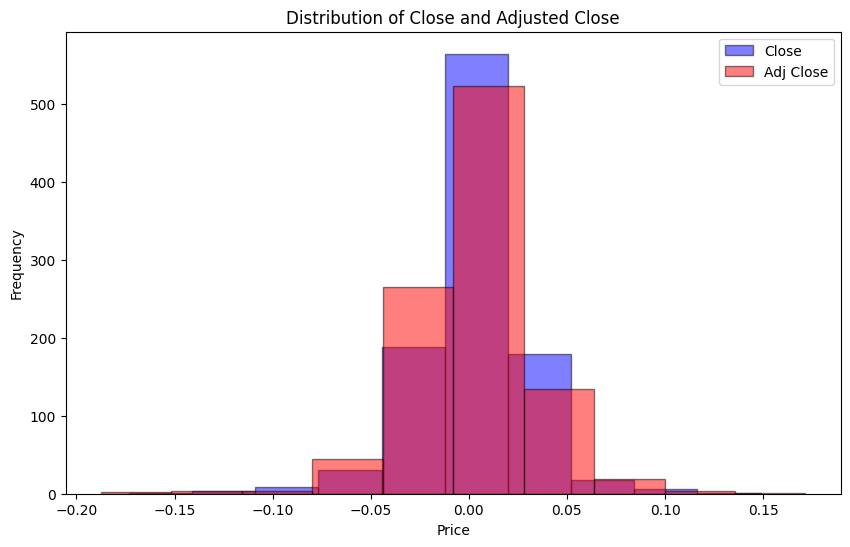

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制 'close' 列的直方图
plt.hist(df['close'], bins=10, alpha=0.5, label='Close', color='blue', edgecolor='black')

# 绘制 'adj close' 列的直方图
plt.hist(df['adj close'], bins=10, alpha=0.5, label='Adj Close', color='red', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Close and Adjusted Close')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [17]:
p1 = '/root/firsttry/CMIN/CMIN-US/price/raw/AAPL.csv'
df_raw = pd.read_csv(p1)
p2 = '/root/firsttry/CMIN/CMIN-US/price/processed/AAPL.txt'
df_prod = pd.read_csv(p2, sep='\t', header=None, names=['dt', 'open', 'high', 'low', 'close', 'adj close', 'volume'])

In [20]:
df_raw['Close'].shift(1)

0              NaN
1        43.064999
2        43.057499
3        43.257500
4        43.750000
           ...    
1003    176.279999
1004    180.330002
1005    179.289993
1006    179.380005
1007    178.199997
Name: Close, Length: 1008, dtype: float64

In [21]:
(df_raw['Close'] - df_raw['Close'].shift(1)) / df_raw['Close'].shift(1)

0            NaN
1      -0.000174
2       0.004645
3       0.011385
4      -0.003714
          ...   
1003    0.022975
1004   -0.005767
1005    0.000502
1006   -0.006578
1007   -0.003535
Name: Close, Length: 1008, dtype: float64

In [19]:
df_prod

,dt,open,high,low,close,adj close,volume
0,2018-01-03,-0.000174,0.013928,0.013059,0.015952,-0.000174,118071600
1,2018-01-04,0.004645,0.000058,-0.006187,0.000698,0.004645,89738400
2,2018-01-05,0.011385,0.005216,0.010953,0.005637,0.011385,94640000
3,2018-01-08,-0.003714,0.005247,0.001369,0.005085,-0.003714,82271200
4,2018-01-09,-0.000115,0.001147,-0.003132,-0.002990,-0.000115,86336000
...,...,...,...,...,...,...,...
997,2021-12-17,-0.006502,-0.052153,-0.042343,-0.006208,-0.006502,195432700
998,2021-12-20,-0.008122,-0.009710,-0.016660,-0.013142,-0.008122,107499100
999,2021-12-21,0.019087,0.019491,0.015359,0.009913,0.019087,91185900
1000,2021-12-22,0.015319,0.008627,0.015358,0.017916,0.015319,92135300
